# Week 5 Exercise 4
## Create a forecasted cost O/E Ratio per Patient

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel('w5e2_patient_cost_forecast_vinay.xlsx',index_col='id')

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 22632 entries, 53e40e98-c764-53a4-aaf6-6318a3c3c95d to 9fdfb702-0f46-8899-fe8c-363733532bb6
Data columns (total 138 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    first                                      object 
 1    last                                       object 
 2    city                                       object 
 3    state                                      object 
 4    county                                     object 
 5    fips                                       int64  
 6    lat                                        float64
 7    lon                                        float64
 8    birthdate                                  object 
 9    marital                                    object 
 10   race                                       object 
 11   ethnicity                                  object 
 12   gender                   

## Establish an expected cost (for a reference group)

In [4]:
# Expected value for forecasted cost of reference group
#y = df['cost_total_2yr']
y = df['cost_yearplus1']
# Establish the reference group through feature selection for the model
df['const'] = 1
X = df[['const', 'risk_score_morbidity']]
X_dummies = pd.get_dummies(df['insurancetype'], prefix='insurancetype', drop_first=True)
#add a column with no insurance type if all the elements  in the row are 0
X_dummies['insurancetype_NotAvailable'] = X_dummies.apply(lambda x: 1 if x.sum() == 0 else 0, axis=1)
X = pd.concat([X, X_dummies], axis=1)

In [5]:
X

,const,risk_score_morbidity,insurancetype_dualelig,insurancetype_medicaid,insurancetype_medicare,insurancetype_noins,insurancetype_NotAvailable
id,,,,,,,
53e40e98-c764-53a4-aaf6-6318a3c3c95d,1,0.00,0,0,0,0,1
c87850c0-6c2e-7312-b050-cfcc2a74be53,1,99.46,0,0,1,0,0
0c99afa9-03c2-f695-efe2-7943262bbbc7,1,0.20,0,0,0,0,1
5e8c9aa2-90da-8e27-7d6f-c6b0faf50169,1,7.90,0,0,0,0,1
ce8b6d28-f7a3-8427-6ca6-0f01fc5422d4,1,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...
9e386110-9e48-346c-7363-86669d6cfa8d,1,5.96,0,0,0,0,1
f2ad9924-0e5e-4ed4-a600-bc4341c440b6,1,7.41,0,0,1,0,0
b3882e05-5ad3-36d9-8822-d5ff0fe187bb,1,81.58,0,0,1,0,0


In [6]:
#model = sm.OLS(y, X).fit()
model = sm.RLM(y, X).fit() # Use robust linear model to assist with outliers

# model = RandomForestRegressor( random_state=42)

# model.fit(X, y)

# model.feature_importances_

In [7]:
# Get the predicted cost for each patient given the model above
df['cost_refgroup_predicted'] = model.predict(X)
df['cost_refgroup_predicted'] = df['cost_refgroup_predicted'].round(2)

df['cost_refgroup_predicted'].describe()

count    22632.000000
mean      2941.013527
std        597.333340
min       1758.290000
25%       2570.970000
50%       2696.950000
75%       3290.415000
max       4143.650000
Name: cost_refgroup_predicted, dtype: float64

In [32]:
# Calculate the OE of observed (actual) costs divided by expected (predicted) costs
#assign 0/0 to 1 to avoid divide by zero error

#df['cost_forecast_oe_ratio'] = df['cost_yearplus1'] / df['cost_refgroup_predicted']

for index, row in df.iterrows():
    if df.loc[index, 'cost_yearplus1'] == 0 and df.loc[index, 'cost_refgroup_predicted'] == 0:
        df.loc[index, 'cost_forecast_oe_ratio'] = 1
    else:
        df.loc[index, 'cost_forecast_oe_ratio'] = df.loc[index, 'cost_yearplus1'] / df.loc[index, 'cost_refgroup_predicted']
        
df['cost_forecast_oe_ratio'] = df['cost_forecast_oe_ratio'].round(2)

In [8]:
#find the r2 score
from sklearn.metrics import r2_score

r2_score(df['cost_yearplus1'], df['cost_refgroup_predicted'])

-0.0702414048417297

In [33]:
# Clean up... just a quirk of this particular model
df = df.drop(columns=['const'])

KeyError: "['const'] not found in axis"

## Describe the results

In [34]:
df['cost_forecast_oe_ratio'].describe()

count    22632.000000
mean         0.864788
std          2.306911
min          0.000000
25%          0.000000
50%          0.070000
75%          1.020000
max         31.060000
Name: cost_forecast_oe_ratio, dtype: float64

In [29]:
#clip the outliers to 5

df['cost_forecast_oe_ratio'] = df['cost_forecast_oe_ratio'].clip(upper=5)


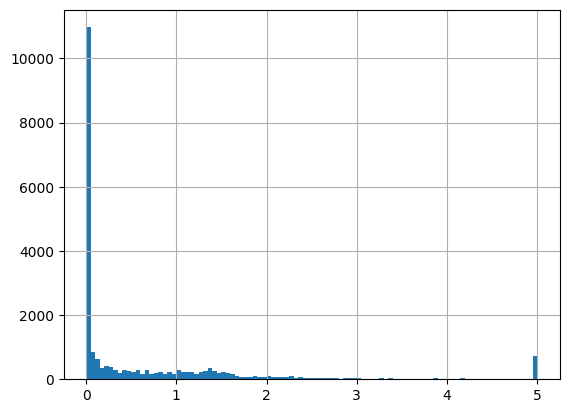

In [30]:
import matplotlib.pyplot as plt
df['cost_forecast_oe_ratio'].hist(bins=100)
plt.show()

In [30]:
df['cost_forecast_oe_ratio']

id
53e40e98-c764-53a4-aaf6-6318a3c3c95d    0.74
c87850c0-6c2e-7312-b050-cfcc2a74be53    3.71
0c99afa9-03c2-f695-efe2-7943262bbbc7    0.00
5e8c9aa2-90da-8e27-7d6f-c6b0faf50169    0.00
ce8b6d28-f7a3-8427-6ca6-0f01fc5422d4    0.00
                                        ... 
9e386110-9e48-346c-7363-86669d6cfa8d    0.28
f2ad9924-0e5e-4ed4-a600-bc4341c440b6    1.09
b3882e05-5ad3-36d9-8822-d5ff0fe187bb    0.00
69426d6b-5c07-b1b7-41fc-060a788819c8    0.00
9fdfb702-0f46-8899-fe8c-363733532bb6    0.95
Name: cost_forecast_oe_ratio, Length: 22632, dtype: float64

## Output

In [36]:
df.to_excel('w5e4_patient_cost_forecast_oe.xlsx')

In [1]:
!pip 